In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [2]:
from dateutil import parser

In [3]:
import salem

In [4]:
from subprocess import call

In [5]:
# url = "ftp://ftp.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171210_for_20171224to20180325.nc"

In [6]:
url = "ftp://ftp.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v4/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171126_for_20171210to20180325.nc"

In [7]:
dates = url.split('_')[-1].split(".")[-2].split("to")

In [8]:
dates

['20171210', '20180325']

In [9]:
dates = list(map(parser.parse, dates))

In [10]:
dates_range = pd.date_range(start=dates[0], freq='7d', periods=12)

In [11]:
dates_range

DatetimeIndex(['2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31',
               '2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],
              dtype='datetime64[ns]', freq='7D')

In [12]:
opath = "/Volumes/GDATA/data/CRW/outlook/"

In [13]:
filename = url.split("/")[-1]

In [14]:
filename

'cfsv2_outlook-060perc_4mon-and-wkly_v4_icwk20171126_for_20171210to20180325.nc'

In [15]:
download = True

In [16]:
if download:
    cmd = "curl --silent {} -o {}/{}".format(url, opath, filename)
    r = call(cmd, shell=True)

In [17]:
dset = xr.open_dataset(os.path.join(opath, filename))

In [19]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720, time: 1)
Coordinates:
  * time               (time) datetime64[ns] 2017-12-03T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (time, lat, lon) float64 ...
    CRW_BAA_Week_01    (time, lat, lon) float64 ...
    CRW_BAA_Week_02    (time, lat, lon) float64 ...
    CRW_BAA_Week_03    (time, lat, lon) float64 ...
    CRW_BAA_Week_04    (time, lat, lon) float64 ...
    CRW_BAA_Week_05    (time, lat, lon) float64 ...
    CRW_BAA_Week_06    (time, lat, lon) float64 ...
    CRW_BAA_Week_07    (time, lat, lon) float64 ...
    CRW_BAA_Week_08    (time, lat, lon) float64 ...
    CRW_BAA_Week_09    (time, lat, lon) float64 ...
    CRW_BAA_Week_10    (time, lat, lon) float64 ...
    CRW_BAA_Week_11    (time, lat, lon) float64 ...
    CRW_BAA

In [20]:
dset = dset.squeeze()

In [21]:
dset

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720)
Coordinates:
    time               datetime64[ns] 2017-12-03T12:00:00
  * lat                (lat) float32 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * lon                (lon) float32 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 ...
Data variables:
    surface_flag       (lat, lon) int8 ...
    CRW_BAA_FourMonth  (lat, lon) float64 ...
    CRW_BAA_Week_01    (lat, lon) float64 ...
    CRW_BAA_Week_02    (lat, lon) float64 ...
    CRW_BAA_Week_03    (lat, lon) float64 ...
    CRW_BAA_Week_04    (lat, lon) float64 ...
    CRW_BAA_Week_05    (lat, lon) float64 ...
    CRW_BAA_Week_06    (lat, lon) float64 ...
    CRW_BAA_Week_07    (lat, lon) float64 ...
    CRW_BAA_Week_08    (lat, lon) float64 ...
    CRW_BAA_Week_09    (lat, lon) float64 ...
    CRW_BAA_Week_10    (lat, lon) float64 ...
    CRW_BAA_Week_11    (lat, lon) float64 ...
    CRW_BAA_Week_12    (lat, lon) float64 ...
    CRW_BAA_Week_13    (lat, lon) float64 ...
    CRW

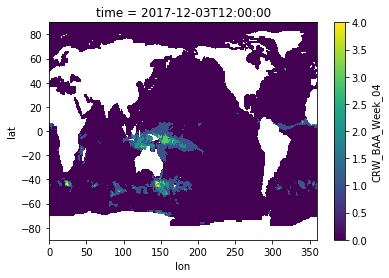

In [22]:
dset['CRW_BAA_Week_04'].plot()

In [23]:
dset = dset.sel(lon=slice(100, 300), lat=slice(50, -50))

In [24]:
variables = ["CRW_BAA_Week_{:02d}".format(x) for x in range(2, 14)]

In [25]:
variables

['CRW_BAA_Week_02',
 'CRW_BAA_Week_03',
 'CRW_BAA_Week_04',
 'CRW_BAA_Week_05',
 'CRW_BAA_Week_06',
 'CRW_BAA_Week_07',
 'CRW_BAA_Week_08',
 'CRW_BAA_Week_09',
 'CRW_BAA_Week_10',
 'CRW_BAA_Week_11',
 'CRW_BAA_Week_12',
 'CRW_BAA_Week_13']

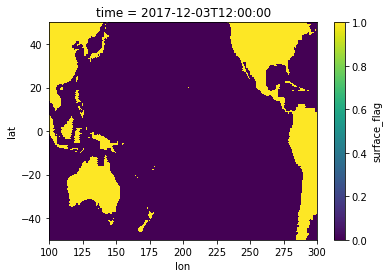

In [26]:
dset['surface_flag'].plot()

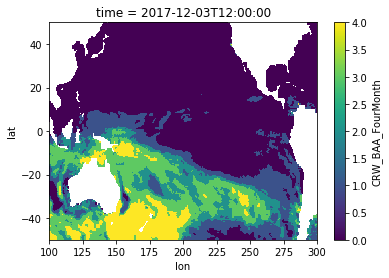

In [27]:
dset['CRW_BAA_FourMonth'].plot()

In [28]:
dset = dset[variables]

In [29]:
l = [] 
for v in variables: 
    d = dset[v]
    d.name = 'CRW_BAA'
    l.append(d)

In [30]:
dset = xr.concat(l, dim='time')

In [31]:
dset['time'] = (('time'), dates_range)

In [32]:
dset

<xarray.DataArray 'CRW_BAA' (time: 12, lat: 200, lon: 400)>
array([[[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  1.,   0., ...,   0.,   0.]],

       ..., 
       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]]])
Coordinates:
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...
  * time     (time) datetime64[ns] 2017-12-10 2017-12-17 2017-12-24

In [91]:
dset

<xarray.DataArray 'CRW_BAA' (time: 12, lat: 200, lon: 400)>
array([[[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  0.,   0., ...,   0.,   0.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  0.,   0., ...,   0.,   0.],
        [  1.,   0., ...,   0.,   0.]],

       ..., 
       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]],

       [[ nan,  nan, ...,   0.,   0.],
        [ nan,  nan, ...,   0.,   0.],
        ..., 
        [  4.,   4., ...,   1.,   1.],
        [  4.,   4., ...,   1.,   1.]]])
Coordinates:
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...
  * time     (time) datetime64[ns] 2017-12-10 2017-12-17 2017-12-24

In [33]:
max_cat = dset.max('time')

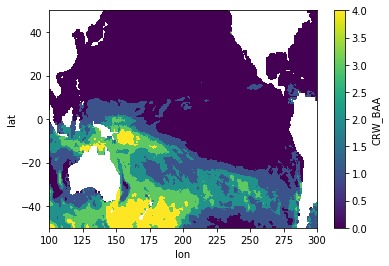

In [34]:
max_cat.plot()

In [35]:
max_cat

<xarray.DataArray 'CRW_BAA' (lat: 200, lon: 400)>
array([[ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       ..., 
       [  4.,   4.,   4., ...,   1.,   1.,   1.],
       [  4.,   4.,   4., ...,   1.,   1.,   1.],
       [  4.,   4.,   4., ...,   1.,   1.,   1.]])
Coordinates:
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...

In [36]:
mask = max_cat.data.copy()

In [37]:
mask[~np.isnan(mask)] = 1

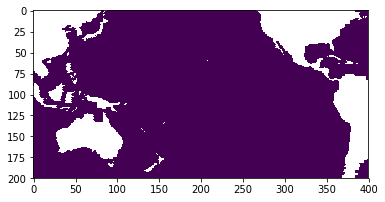

In [38]:
plt.imshow(mask)

In [39]:
posmax = dset.argmax(dim='time', skipna=False)

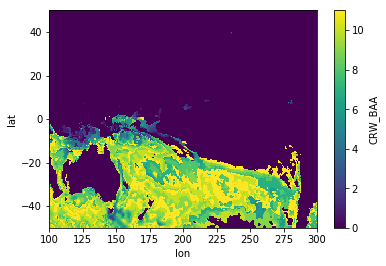

In [40]:
posmax.plot()

In [41]:
posmax_masked = posmax.data * mask

In [42]:
posmax_masked

array([[ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       ..., 
       [ 10.,  10.,  10., ...,   8.,   7.,   7.],
       [  9.,  10.,  10., ...,   8.,   7.,   7.],
       [ 10.,  10.,  10., ...,   8.,   7.,   7.]])

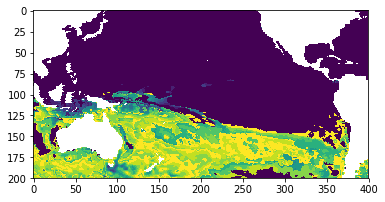

In [43]:
plt.imshow(posmax_masked)

In [44]:
max_cat

<xarray.DataArray 'CRW_BAA' (lat: 200, lon: 400)>
array([[ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,   0.,   0.,   0.],
       ..., 
       [  4.,   4.,   4., ...,   1.,   1.,   1.],
       [  4.,   4.,   4., ...,   1.,   1.,   1.],
       [  4.,   4.,   4., ...,   1.,   1.,   1.]])
Coordinates:
  * lon      (lon) float32 100.25 100.75 101.25 101.75 102.25 102.75 103.25 ...
  * lat      (lat) float32 49.75 49.25 48.75 48.25 47.75 47.25 46.75 46.25 ...

In [45]:
posmax_masked = xr.DataArray(posmax_masked, dims=('lat','lon'), coords={'lat':dset.lat.data, 'lon':dset.lon.data})

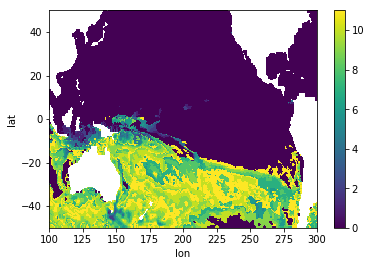

In [46]:
posmax_masked.plot()

In [48]:
d = xr.Dataset()

In [49]:
d['posmax_masked'] = posmax_masked

In [50]:
d['max_cat'] = max_cat

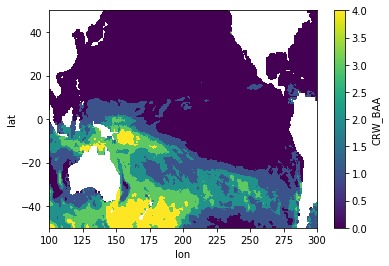

In [51]:
max_cat.plot()

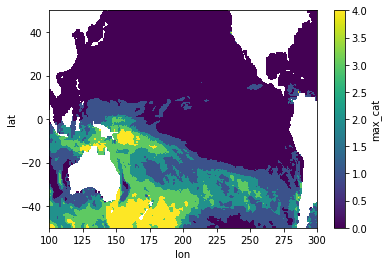

In [52]:
d['max_cat'].plot()

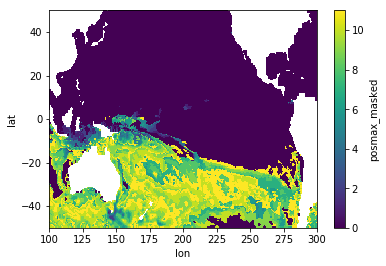

In [53]:
d['posmax_masked'].plot()

In [54]:
from glob import glob

In [55]:
lfiles = glob("../shapefiles/shapes_*_converted.shp")

In [56]:
lfiles

['../shapefiles/shapes_Nauru_converted.shp',
 '../shapefiles/shapes_Northern_Cook_Islands_converted.shp',
 '../shapefiles/shapes_Pitcairn_Islands_converted.shp',
 '../shapefiles/shapes_Tonga_converted.shp',
 '../shapefiles/shapes_Niue_converted.shp',
 '../shapefiles/shapes_Kiribati_Gilbert_Islands_converted.shp',
 '../shapefiles/shapes_Wallis_&_Futuna_converted.shp',
 '../shapefiles/shapes_Marshall_Islands_converted.shp',
 '../shapefiles/shapes_Vanuatu_North_converted.shp',
 '../shapefiles/shapes_New_Caledonia_converted.shp',
 '../shapefiles/shapes_Palau_converted.shp',
 '../shapefiles/shapes_Austral_Islands_converted.shp',
 '../shapefiles/shapes_Tuamotu__Gambier_Islands_converted.shp',
 '../shapefiles/shapes_Vanuatu_South_converted.shp',
 '../shapefiles/shapes_Samoa_converted.shp',
 '../shapefiles/shapes_Guam_converted.shp',
 '../shapefiles/shapes_Northern_Marianas_converted.shp',
 '../shapefiles/shapes_Southern_Cook_Islands_converted.shp',
 '../shapefiles/shapes_Solomon_Islands_conve

In [57]:
f = lfiles[0]

In [58]:
f.split('/')[-1].split(".")[-2].replace("shapes_","").replace("_converted","")

'Nauru'

In [73]:
concat_l_summary = []
concat_l_summary_posmax = []  
p90_dict = {}
month_of_max_dict = {}
cnames = []
for f in lfiles: 
    country_name = f.split('/')[-1].split(".")[-2].replace("shapes_","").replace("_converted","")
    print("processing {}".format(country_name))
    cnames.append(country_name)
    sh_country = salem.read_shapefile(f)
    d_subset = d.salem.subset(shape=sh_country, margin=2)
    d_subset_roi = d_subset.salem.roi(shape=sh_country) 
    d_subset_roi_stacked = d_subset_roi.stack(z=('lat','lon')) 
    df = d_subset_roi_stacked['max_cat'].to_dataframe() 
    df = df.dropna() 
    summary_df = df.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9]) 
    df_pos = d_subset_roi_stacked['posmax_masked'].to_dataframe() 
    dfl = df.copy() 
    dfl.loc[:,'posmax_masked'] = df_pos 
    dfl_sub = dfl.query("max_cat == {}".format(df.quantile(0.9)[0])) 
    summary_df_posmax = dfl_sub.posmax_masked.describe(percentiles=[0.1, 0.25, 0.5, 0.6, 0.7, 0.8, 0.9])
    mode = dfl_sub.posmax_masked.mode()
    date_of_max = dates_range[int(dfl_sub.posmax_masked.mode()[0])] 
    month_of_max = date_of_max.month
    p90_dict[country_name] = int(df.quantile(0.9)[0])
    month_of_max_dict[country_name] = month_of_max
    concat_l_summary.append(summary_df)
    concat_l_summary_posmax.append(summary_df_posmax)
    

processing Nauru
processing Northern_Cook_Islands
processing Pitcairn_Islands
processing Tonga
processing Niue
processing Kiribati_Gilbert_Islands
processing Wallis_&_Futuna
processing Marshall_Islands
processing Vanuatu_North
processing New_Caledonia
processing Palau
processing Austral_Islands
processing Tuamotu__Gambier_Islands
processing Vanuatu_South
processing Samoa
processing Guam
processing Northern_Marianas
processing Southern_Cook_Islands
processing Solomon_Islands
processing American_Samoa
processing Tuvalu
processing Federated_States_of_Micronesia
processing Society_Islands
processing Kiribati_Line_Islands
processing Fiji
processing Kiribati_Phoenix_Islands
processing Marquesas
processing Papua_New_Guinea
processing Tokelau


In [74]:
p90_df = pd.DataFrame(p90_dict, index=['max_category']).T

In [75]:
month_of_max_df = pd.DataFrame(month_of_max_dict, index=['max_month']).T

In [76]:
all_df = pd.concat([p90_df, month_of_max_df], axis=1)

In [90]:
all_df

,max_category,max_month
American_Samoa,2,2
Austral_Islands,2,2
Federated_States_of_Micronesia,1,12
Fiji,3,2
Guam,0,12
Kiribati_Gilbert_Islands,1,1
Kiribati_Line_Islands,0,12
Kiribati_Phoenix_Islands,0,12
Marquesas,0,12
Marshall_Islands,1,12


In [82]:
concat_l_summary_df = pd.concat(concat_l_summary, axis=1)

In [83]:
concat_l_summary_df.columns = cnames

In [84]:
concat_l_summary_df 

,Nauru,Northern_Cook_Islands,Pitcairn_Islands,Tonga,Niue,Kiribati_Gilbert_Islands,Wallis_&_Futuna,Marshall_Islands,Vanuatu_North,New_Caledonia,...,American_Samoa,Tuvalu,Federated_States_of_Micronesia,Society_Islands,Kiribati_Line_Islands,Fiji,Kiribati_Phoenix_Islands,Marquesas,Papua_New_Guinea,Tokelau
count,101.000000,351.000000,302.000000,227.000000,112.000000,340.000000,81.000000,659.000000,128.000000,378.000000,...,134.000000,250.000000,982.000000,304.000000,540.000000,443.000000,243.000000,227.0,787.000000,106.000000
mean,0.960396,0.720798,1.493377,1.872247,1.125000,0.391176,2.790123,0.191199,2.250000,2.296296,...,1.716418,1.572000,0.686354,0.927632,0.070370,1.975169,0.032922,0.0,2.598475,0.867925
std,0.398015,0.664698,0.597577,0.621500,0.332205,0.488733,0.466799,0.393544,0.434714,0.506758,...,0.529036,0.779259,0.625158,0.558191,0.256007,0.885692,0.178800,0.0,0.832787,0.367112
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
10%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,3.000000,1.000000
60%,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,3.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,3.000000,1.000000
70%,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,2.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.000000
80%,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,3.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.0,3.000000,1.000000


In [85]:
concat_l_summary_posmax_df = pd.concat(concat_l_summary_posmax, axis=1)

In [86]:
concat_l_summary_posmax_df.columns = cnames

In [87]:
concat_l_summary_posmax_df

,Nauru,Northern_Cook_Islands,Pitcairn_Islands,Tonga,Niue,Kiribati_Gilbert_Islands,Wallis_&_Futuna,Marshall_Islands,Vanuatu_North,New_Caledonia,...,American_Samoa,Tuvalu,Federated_States_of_Micronesia,Society_Islands,Kiribati_Line_Islands,Fiji,Kiribati_Phoenix_Islands,Marquesas,Papua_New_Guinea,Tokelau
count,85.000000,42.000000,117.000000,31.000000,14.000000,133.000000,63.000000,126.000000,32.000000,121.000000,...,86.000000,31.000000,550.000000,37.000000,502.0,123.000000,235.0,227.0,104.000000,90.000000
mean,1.694118,10.976190,10.965812,9.935484,10.285714,4.353383,8.492063,0.071429,9.531250,10.239669,...,9.302326,8.548387,0.020000,10.837838,0.0,9.260163,0.0,0.0,6.894231,0.766667
std,2.586704,0.154303,0.182493,0.727346,0.468807,2.418976,0.800665,0.258567,1.106706,0.671128,...,0.908389,1.178663,0.184953,0.553449,0.0,1.401623,0.0,0.0,2.167358,1.453782
min,0.000000,10.000000,10.000000,9.000000,10.000000,0.000000,7.000000,0.000000,8.000000,9.000000,...,8.000000,6.000000,0.000000,9.000000,0.0,6.000000,0.0,0.0,3.000000,0.000000
10%,0.000000,11.000000,11.000000,9.000000,10.000000,2.000000,8.000000,0.000000,8.000000,9.000000,...,8.000000,8.000000,0.000000,11.000000,0.0,7.200000,0.0,0.0,4.000000,0.000000
25%,0.000000,11.000000,11.000000,9.000000,10.000000,3.000000,8.000000,0.000000,9.000000,10.000000,...,9.000000,8.000000,0.000000,11.000000,0.0,8.000000,0.0,0.0,5.000000,0.000000
50%,0.000000,11.000000,11.000000,10.000000,10.000000,5.000000,8.000000,0.000000,9.500000,10.000000,...,9.000000,8.000000,0.000000,11.000000,0.0,9.000000,0.0,0.0,7.000000,0.000000
60%,1.000000,11.000000,11.000000,10.000000,10.000000,5.000000,9.000000,0.000000,10.000000,10.000000,...,9.000000,8.000000,0.000000,11.000000,0.0,10.000000,0.0,0.0,7.800000,1.000000
70%,2.000000,11.000000,11.000000,10.000000,10.100000,5.000000,9.000000,0.000000,10.000000,11.000000,...,10.000000,9.000000,0.000000,11.000000,0.0,10.000000,0.0,0.0,8.000000,1.000000
80%,3.000000,11.000000,11.000000,11.000000,11.000000,5.000000,9.000000,0.000000,11.000000,11.000000,...,10.000000,9.000000,0.000000,11.000000,0.0,11.000000,0.0,0.0,9.000000,1.000000


In [88]:
all_df.to_csv('../outputs/CSFV2_outlook_summary_table_from_{:%Y%m%d}.csv'.format(dates_range[0]))

In [89]:
dates_range

DatetimeIndex(['2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31',
               '2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],
              dtype='datetime64[ns]', freq='7D')